# Predict The Flight Ticket Price 

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. 
Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Our target is to predict the flight prices, which is very challenging in the current decade as it changes on the real time basis. Lets see, what all we could find out with the given dataset.



FEATURES are as follows :

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket


Importing or calling all necessary models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# DataSet:
Loading / Cleaning / Formatting

In [2]:
#Data ment for training :
df=pd.read_csv('Data_Train.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
#Data ment for testing :
dft=pd.read_csv('Test_set.csv')
dft

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
#shape of the data
df.shape

(10683, 11)

In [5]:
dft.shape

(2671, 10)

In [6]:
#Information required of the datasets:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#Information required of the datasets:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# Checking Missing Values:

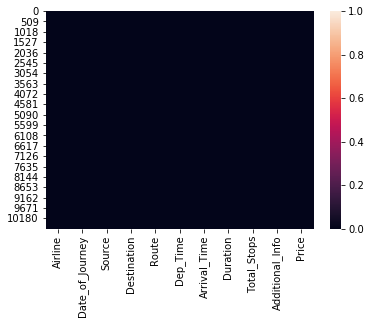

In [8]:
sns.heatmap(df.isnull())

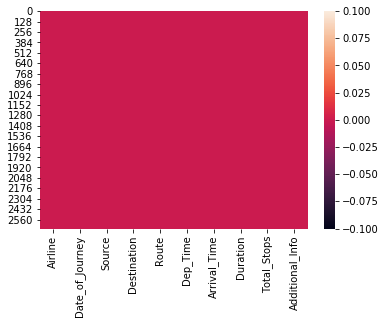

In [9]:
sns.heatmap(dft.isnull())

The above both graph is here to show that if there are any null values in the above dataset, it represent that none of the value is emmpty(Null Values). 
In order to get more clearity we have taken out the sum of the total Null Values down which is not giving us the same output that is , ' 0 ' . There are missing values present in Route and Total stops. Hence we will be removing it.

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
dft.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [12]:
df["Route"] = df["Route"].fillna(df["Route"].dropna().mode().values[0] )

In [13]:
df["Total_Stops"] = df["Total_Stops"].fillna(df["Total_Stops"].dropna().mode().values[0] )

In [14]:
#Checking again , if there is any other missing values presnt or not.
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

Finding the Uniqueness in some of the data :

In [15]:
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [16]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [17]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [18]:
df['Additional_Info'].replace('No Info', 'No info', inplace = True)

In [19]:
dft.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Long layover', 'Business class',
       'Change airports'], dtype=object)

In [20]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In the description we can see that we have price total counts i.e. 10683, Average price of the all the cases is 9087.06 where standard deviation is at 4611. We could also see the minimum price and maximum price of the flights that is min- 1759 , max-79512.

In [21]:
dft.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


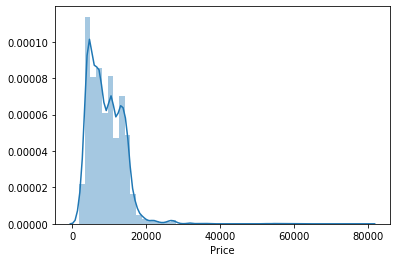

In [22]:
sns.distplot(df['Price'])

Distplot represents the univariate distribution of data i.e. data distribution of a variable that is Price which is against the density distribution. The seaborn. distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

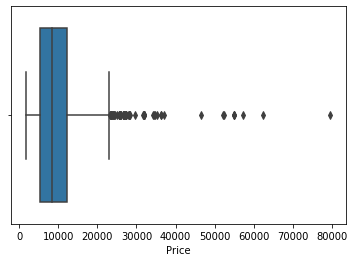

In [23]:
sns.boxplot(df['Price'])

The above boxplot shows the min, maximum and median price of the flights it also shows some of the pointers are away or far from the box thor=se are the outliers present in the dataset, but as we know that it is the price of the flights which changes on the realtime, thus we will not remove the outliers here.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba2e80c890>]],
      dtype=object)

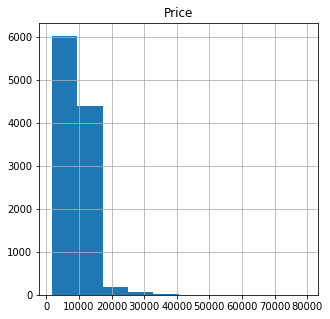

In [24]:
df.hist(figsize=(5,5))

Withe the above histogram we could see that the total count or the distribution of the prices with respect to the flight. Around 95% of the flights prices are below 18000, Around 6000 flights prices are in the range of 0 - 10000.

In [25]:
def flight_departure_time(X):
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'midnight'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'

In [26]:
df['flight_time'] = df['Dep_Time'].apply(flight_departure_time)

Text(0, 0.5, 'Count of The Flights')

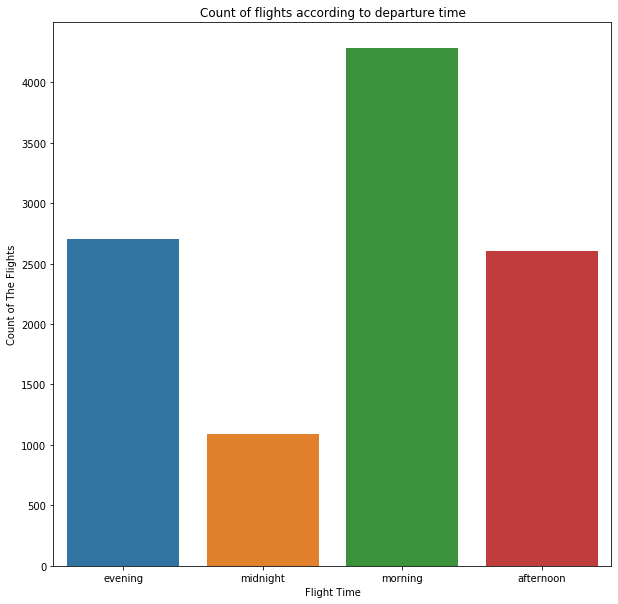

In [27]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'flight_time', data = df)
plt.xlabel('Flight Time')
plt.ylabel('Count of The Flights')

The above graph that is Count of flights according to the departure time implies that more than 4000 flights take off in the morning time where the least flights are taking off in the midnight, this is because people usually prefer to travel in the day or morning time other than in the midnight.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

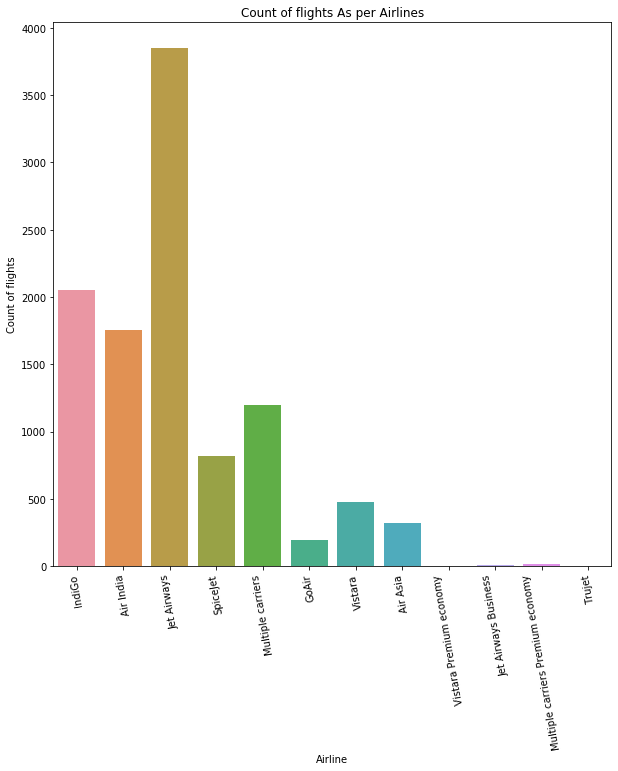

In [28]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights As per Airlines')
sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 100)

Count of flights As per Airlines: Shows that number of airlines present in our dataset and the count of the flights with resspect to the airlines. Highest number of flights which are running is of Jet airways, followed by Indigo and air india. Go air , vistara air ashia, vistara premium jet airways business and trujet have minimal flights.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

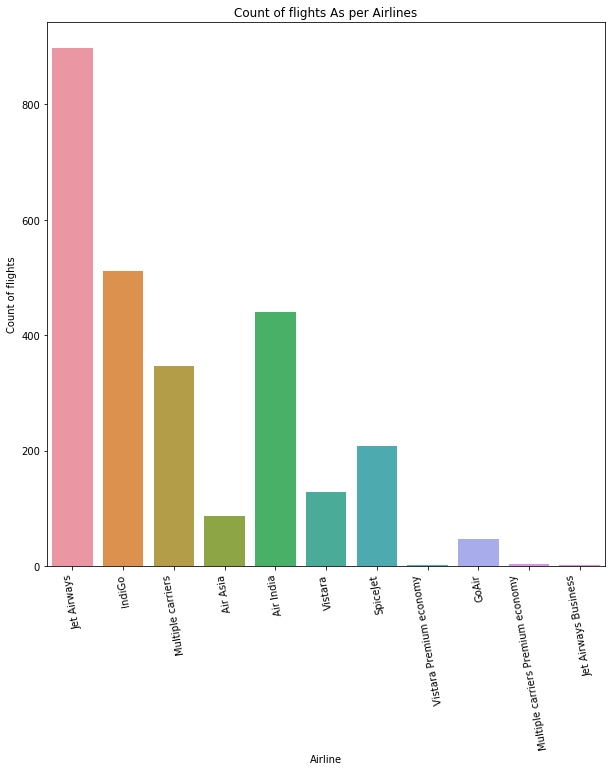

In [29]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights As per Airlines')
sns.countplot(x = 'Airline', data = dft)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 100)

In [30]:
#making seperate columns of year, mont and day:
df['year'] = pd.DatetimeIndex(df['Date_of_Journey']).year
df['month'] = pd.DatetimeIndex(df['Date_of_Journey']).month
df['Day'] = pd.DatetimeIndex(df['Date_of_Journey']).day

In [31]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flight_time,year,month,Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,evening,2019,3,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,midnight,2019,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,morning,2019,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,evening,2019,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,afternoon,2019,1,3


Text(0, 0.5, 'Count of flights')

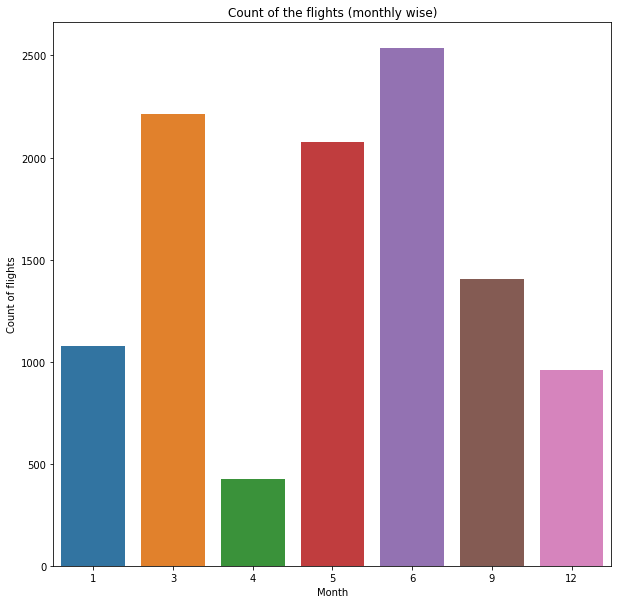

In [32]:
plt.figure(figsize = (10 , 10))
plt.title('Count of the flights (monthly wise)')
sns.countplot(x = 'month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')

With respect to the above graph "Count of the flights (monthly wise)" it shows the number of flights running in the which month. Here we could see that in the month of june most number of the flights are running followed by march and may but in the month of April we see that minimum amount of flights are running that may be because of the not much passenger travel in the month of the April and this is the time we could find more discounts on the flights.

In [33]:
#the duration time has been given in hours and min, we will convert the time taken by the flights in seconds:
import re
def convert_into_seconds(X):
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df['Duration(sec)'] = df['Duration'].map(convert_into_seconds)

Text(0, 0.5, 'Price of ticket')

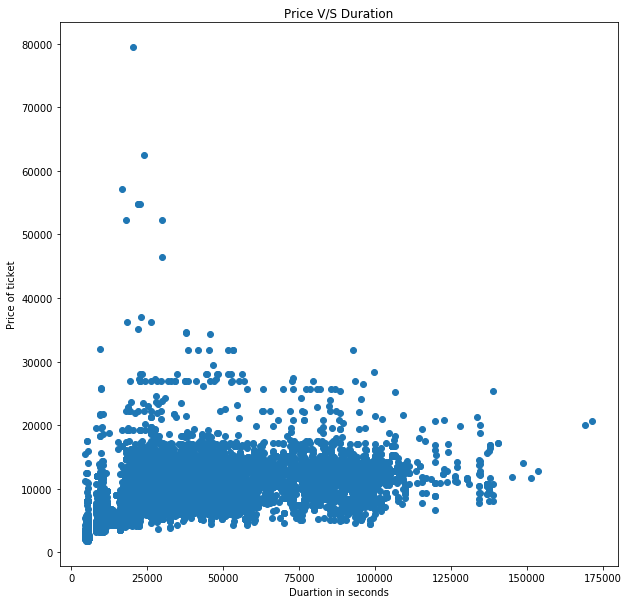

In [34]:
plt.figure(figsize = (10, 10))
plt.title('Price V/S Duration')
plt.scatter(df['Duration(sec)'], df['Price'])
plt.xlabel('Duartion in seconds')
plt.ylabel('Price of ticket')

The above graph shows that relationship between price of the flight tiket and duration of the flight. we could see that how the price changes as there is any change in the duration of the flight.

In [35]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,flight_time,year,month,Day,Duration(sec)
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,evening,2019,9,4,9000
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,evening,2019,4,27,9300
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,morning,2019,4,27,10800
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,morning,2019,1,3,9600
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753,morning,2019,9,5,30000


In [36]:
#Removing al the columns which are of no use in order to predict the price of the flights:
df.drop(['Date_of_Journey','Day','year','Route', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)


In [37]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,flight_time,month,Duration(sec)
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,evening,3,10200
1,Air India,Kolkata,Banglore,2 stops,No info,7662,midnight,1,26700
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,morning,9,68400
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,evening,12,19500
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,afternoon,1,17100
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,evening,9,9000
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,evening,4,9300
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,morning,4,10800
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,morning,1,9600


# Label Encoder

In [38]:
#converting the object dtype columns and giving then numerical values with the help of Label encoder:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,flight_time,month,Duration(sec)
0,3,0,5,4,7,3897,1,3,10200
1,1,3,0,1,7,7662,2,1,26700
2,4,2,1,1,7,13882,3,9,68400
3,3,3,0,0,7,6218,1,12,19500
4,3,0,5,0,7,13302,0,1,17100


In [39]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,flight_time,month,Duration(sec)
0,3,0,5,4,7,3897,1,3,10200
1,1,3,0,1,7,7662,2,1,26700
2,4,2,1,1,7,13882,3,9,68400
3,3,3,0,0,7,6218,1,12,19500
4,3,0,5,0,7,13302,0,1,17100
...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,7,4107,1,9,9000
10679,1,3,0,4,7,4145,1,4,9300
10680,4,0,2,4,7,7229,3,4,10800
10681,10,0,5,4,7,12648,3,1,9600


In [40]:
df.dtypes

Airline            int64
Source             int64
Destination        int64
Total_Stops        int64
Additional_Info    int64
Price              int64
flight_time        int64
month              int64
Duration(sec)      int64
dtype: object

Bringing the Price column to the first in order to ease our processing.

In [41]:
mid = df['Price']
df.drop(labels=['Price'], axis=1, inplace = True)
df.insert(0, 'Price', mid)
df.head()

,Price,Airline,Source,Destination,Total_Stops,Additional_Info,flight_time,month,Duration(sec)
0,3897,3,0,5,4,7,1,3,10200
1,7662,1,3,0,1,7,2,1,26700
2,13882,4,2,1,1,7,3,9,68400
3,6218,3,3,0,0,7,1,12,19500
4,13302,3,0,5,0,7,0,1,17100


In [42]:
df.to_csv('airlinesfinal_data.csv', index = None)

# Skewness:

In [43]:
df.skew()

Price              1.812552
Airline            0.731095
Source            -0.424054
Destination        1.244169
Total_Stops        0.631681
Additional_Info   -2.114551
flight_time       -0.118834
month              0.629540
Duration(sec)      0.861203
dtype: float64

In [44]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [45]:
df.skew()

Price             -0.254565
Airline           -0.679875
Source            -0.424054
Destination        0.283084
Total_Stops        0.466484
Additional_Info   -2.114551
flight_time       -0.118834
month             -0.531227
Duration(sec)     -0.164533
dtype: float64

# Assigning X AND Y Variables:

In [46]:
x=df.iloc[:,1:9]
x.shape
x

,Airline,Source,Destination,Total_Stops,Additional_Info,flight_time,month,Duration(sec)
0,1.386294,0,1.791759,1.609438,7,1,1.386294,9.230241
1,0.693147,3,0.000000,0.693147,7,2,0.693147,10.192456
2,1.609438,2,0.693147,0.693147,7,3,2.302585,11.133143
3,1.386294,3,0.000000,0.000000,7,1,2.564949,9.878221
4,1.386294,0,1.791759,0.000000,7,0,0.693147,9.746892
...,...,...,...,...,...,...,...,...
10678,0.000000,3,0.000000,1.609438,7,1,2.302585,9.105091
10679,0.693147,3,0.000000,1.609438,7,1,1.609438,9.137877
10680,1.609438,0,1.098612,1.609438,7,3,1.609438,9.287394
10681,2.397895,0,1.791759,1.609438,7,3,0.693147,9.169623


In [47]:
y=df.iloc[:,0:1]
y.shape
y.head()

,Price
0,8.268219
1,8.944159
2,9.538420
3,8.735364
4,9.495745


# Using Standard Scaler:
To bring all the values at the same scale(We can see that applicant income and. loan amount are scaled at different parameters, so we will bring all the vallues at the same scale.)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_x_scaler = scaler.transform(x)
x = pd.DataFrame(df1_x_scaler)
x.head()

,0,1,2,3,4,5,6,7
0,-0.173359,-1.658441,1.897504,1.353931,0.49862,-0.536862,-0.754430,-1.063078
1,-1.484192,0.890052,-1.300469,0.088179,0.49862,0.275963,-2.142070,-0.003148
2,0.248636,0.040555,-0.063324,0.088179,0.49862,1.088788,1.079931,1.033066
3,-0.173359,0.890052,-1.300469,-0.869325,0.49862,-0.536862,1.605169,-0.349295
4,-0.173359,-1.658441,1.897504,-0.869325,0.49862,-1.349687,-2.142070,-0.493960


# MODEL SELECTION
Using different types of model in oder to acquire optimum solution:

# Lasso

In [49]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.0001,0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.0001}

In [50]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lasso=Lasso(alpha=0.0001)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.5440151605659398
r2_score corresponding to random state:  43 is:  0.5574760448804484
r2_score corresponding to random state:  44 is:  0.538006687056344
r2_score corresponding to random state:  45 is:  0.5527377189487863
r2_score corresponding to random state:  46 is:  0.5765090619692723
r2_score corresponding to random state:  47 is:  0.5713203145005207
r2_score corresponding to random state:  48 is:  0.5646243363276482
r2_score corresponding to random state:  49 is:  0.5613592924991437
r2_score corresponding to random state:  50 is:  0.5786683724373733
r2_score corresponding to random state:  51 is:  0.5784137319974536
r2_score corresponding to random state:  52 is:  0.5549233990673864
r2_score corresponding to random state:  53 is:  0.546551620199534
r2_score corresponding to random state:  54 is:  0.5736495697854487
r2_score corresponding to random state:  55 is:  0.5569681417439901
r2_score corresponding to random state:  56 is:  0

# LinearRegression

In [51]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.20,random_state=r_state)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print()
    print()
    print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)
    return final_r_state

In [52]:
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42 is:  0.5440331204442546
r2_score corresponding to random state:  43 is:  0.5574661774933005
r2_score corresponding to random state:  44 is:  0.5379966519736843
r2_score corresponding to random state:  45 is:  0.5527620541801447
r2_score corresponding to random state:  46 is:  0.5765092692305311
r2_score corresponding to random state:  47 is:  0.5713397694671787
r2_score corresponding to random state:  48 is:  0.5646561079923165
r2_score corresponding to random state:  49 is:  0.5613505364698643
r2_score corresponding to random state:  50 is:  0.5786727304662175
r2_score corresponding to random state:  51 is:  0.578407810939988
r2_score corresponding to random state:  52 is:  0.5549095210903815
r2_score corresponding to random state:  53 is:  0.5465059060958315
r2_score corresponding to random state:  54 is:  0.57364215458122
r2_score corresponding to random state:  55 is:  0.5569777992659453
r2_score corresponding to random state:  56 is:  0.

# KNeighborsRegressor

In [53]:
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knn= KNeighborsRegressor()
gknn=GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 6}

In [54]:
knn= KNeighborsRegressor(n_neighbors=6)
r_state=maxr2_score(knn,x,y)

r2_score corresponding to random state:  42 is:  0.7895858509171723
r2_score corresponding to random state:  43 is:  0.797054182769252
r2_score corresponding to random state:  44 is:  0.7865502287146995
r2_score corresponding to random state:  45 is:  0.7870563225795407
r2_score corresponding to random state:  46 is:  0.7967423123153691
r2_score corresponding to random state:  47 is:  0.7937380912934342
r2_score corresponding to random state:  48 is:  0.7934277004523109
r2_score corresponding to random state:  49 is:  0.7991324325668482
r2_score corresponding to random state:  50 is:  0.797949963879017
r2_score corresponding to random state:  51 is:  0.8031591731399816
r2_score corresponding to random state:  52 is:  0.7952545565936892
r2_score corresponding to random state:  53 is:  0.7891657514350858
r2_score corresponding to random state:  54 is:  0.8054793299902013
r2_score corresponding to random state:  55 is:  0.7902079781574372
r2_score corresponding to random state:  56 is:  0

# Error

In [55]:
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error :  0.2720389480087053
Mean Squared error :  0.11387497349076246
RMSE is :  0.33745366124960396


# RandomForestRegressor

In [56]:
from math import log
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [10,50,100,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 200}

In [67]:
rfr=RandomForestRegressor(bootstrap=True,max_features='auto',min_samples_split=2,n_estimators=200)
rfr.fit(x_train, y_train)
rfr.score(x_train,y_train)

0.9347156356074686

In [68]:
pred=rfr.predict(x_test)
pred

array([7.5837563 , 9.47782432, 9.51655132, ..., 8.96896319, 8.46818657,
       8.26461357])

In [69]:
from math import sqrt
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test,pred)))
print("R-squared: ", r2_score(y_test,pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.2007596004002066
R-squared:  0.8462566089889215


# GradientBoostingRegressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20)
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.001,0.01,0.1,0.02,0.03,1],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8]}
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.9}

In [71]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    GBR= GradientBoostingRegressor(learning_rate=0.03,max_depth=6,n_estimators=500,subsample=0.9)
    GBR.fit(x_train,y_train)
    y_pred=GBR.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.8581582262500894
r2_score corresponding to random state:  43 is:  0.8650019432536178
r2_score corresponding to random state:  44 is:  0.8472916080180216
r2_score corresponding to random state:  45 is:  0.8496303866998501
r2_score corresponding to random state:  46 is:  0.8601629450005407
r2_score corresponding to random state:  47 is:  0.8560348077688158
r2_score corresponding to random state:  48 is:  0.8547165540931525
r2_score corresponding to random state:  49 is:  0.8639386549943179
r2_score corresponding to random state:  50 is:  0.8580035000562702
r2_score corresponding to random state:  51 is:  0.8648042633109528
r2_score corresponding to random state:  52 is:  0.851443649008749
r2_score corresponding to random state:  53 is:  0.8395075278667307
r2_score corresponding to random state:  54 is:  0.8636354080500559
r2_score corresponding to random state:  55 is:  0.845549326470301
r2_score corresponding to random state:  56 is:  0

# DecisionTreeRegressor

In [72]:
from sklearn.tree import DecisionTreeRegressor
depth =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [73]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


{'max_depth': 10}

In [74]:
y_train_pred =tree.predict(x_train)
y_test_pred =tree.predict(x_test)

In [75]:
from math import sqrt
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.18467667418896902
R-squared:  0.870840522759019


In [76]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mean_squared_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.20578050618544244
R-squared:  0.8384703422155673


# Cross_val_score

In [77]:
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for knn: ",cross_val_score(knn,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for R_forest Regressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for R_forst Regressor ",cross_val_score(rfr,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for lasso ",cross_val_score(lasso,x,y,cv=5,scoring="r2").std())
print()
print()
print("Mean r2 score for GBR ",cross_val_score(GBR,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation r2 score for GBR ",cross_val_score(GBR,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.5609781812407731
Standard Deviation r2 score for Linear Regression:  0.01628736268311926


Mean r2 score for knn:  0.800497672195396
Standard Deviation r2 score for knn:  0.011534862717394314


Mean r2 score for R_forest Regressor  0.8377537763089883
Standard Deviation r2 score for R_forst Regressor  0.01054523494103698


Mean r2 score for lasso  0.5609781587267016
Standard Deviation r2 score for lasso  0.016295490767905672


Mean r2 score for GBR  0.8601206055997286
Standard Deviation r2 score for GBR  0.008454734765476266


# Choosing a Model:

Here after trying with various model for the above dataset, I am going to choose Random forest regressor as the best model for pridicting the price of the flights. Gradient Boosting Regressor is predicting accuracy score of 87.67% where Decision tree regressor shows 87% , these both model predicted well and they were near to Random Forest Regressor but Randmon Forest Regressor is predicting 93.5% accuracy score.

Hence I am going to predict the price of thr flights with Random Forest Regressor model.

# Saving the Model:

In [78]:
from sklearn.externals import joblib

In [79]:
joblib.dump(rfr,'Project_12_Flight_Price_Analysis.obj')

['Project_12_Flight_Price_Analysis.obj']

In [80]:
#loading back the model:
model=joblib.load('Project_12_Flight_Price_Analysis.obj')

In [81]:
#Pridicting x_test Random Forest Regressor = LOR
rfr.predict(x_test)

array([7.5837563 , 9.47782432, 9.51655132, ..., 8.96896319, 8.46818657,
       8.26461357])